<a href="https://colab.research.google.com/github/surajsarkar/deepLearning/blob/main/notebooks/02_tensorflow_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to neural network classification with TensorFlow**

In this notebook we're going to learn how ot write neural networks for classification problem.

A classification is where you try to classify someting as one thing or another.

A few types of classification problems:
- binary classification 
- Multiclass classification 
- Multilabel classification

## **Creating data to view and fit**

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples 
n_samples = 1000

# Create circles 

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
# Check out features 
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels

y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "lebel": y})

circles

,X0,X1,lebel
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


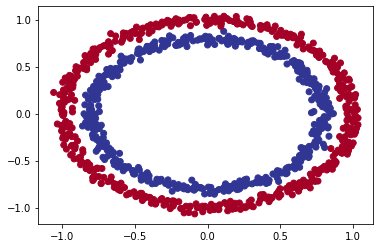

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## **Input and Output shape**

In [ ]:
# Check the shapes of our features and labels.

X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working 

len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels

X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## **Steps in modelling**

The steps in modelling with TensorFlow are typically: 

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [ ]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [ ]:
from numpy import dtype
# Set the random seed 
tf.random.set_seed(42)

# 1. Create the model using the Sequential API

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])


# 2. Compile a model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(), 
                metrics = ['accuracy'])

# 3. Fit the model 

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
model_1.fit(X, y, epochs=200, verbose=0)

model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create a model

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])


# 2. Compile a model

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)


# 3. Fit a model

model_2.fit(X, y, epochs = 200, verbose=0)

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5000


[0.6945482492446899, 0.5]

In [ ]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create a model

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)
])


# 2. Compile a model

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)


# 3. Fit a model

model_3.fit(X, y, epochs = 100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.9720


[0.45203858613967896, 0.972000002861023]

To visualisze our model's predictions, let's create a function `plot_decision_boundary()`, this function will: 
- Take in a trained model, features (X) and labels (y) 

- Create a meshgrid of the different X values
- Make predictions across the meshgrid
- Plot the predictions as well as a line between zones (where each unique class falls)


In [ ]:
import numpy as np 

def plot_decision_boundry(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together 

  # Mke predictions 
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1: 
    print('doing multiclass classification')
    # We have to reshape our prediction to get them ready for plotting 
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else: 
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  

doing binary classification


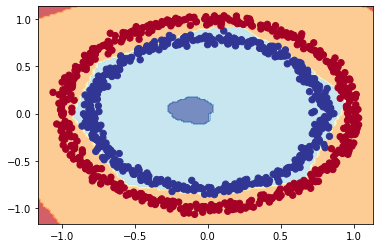

In [ ]:
# Check out the predictions our model is making 

plot_decision_boundry(model=model_3, X=X, y=y)

doing binary classification


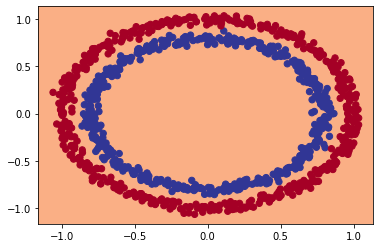

In [ ]:
plot_decision_boundry(model=model_1, X=X, y=y)

In [ ]:
#  # Let's see if our above model works in regression problem
tf.random.set_seed(42)
 # Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# # Split our data in training and test set

x_reg_train = X_regression[:150]
x_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


# # Fit our model to regression data

# model_2.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)



In [ ]:
x_reg_train.shape,

(TensorShape([150]),)

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# Create a model

model_reg = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1)
])

# Compile a model
model_reg.compile(
    loss = tf.keras.losses.mae, 
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# Fit a model

model_reg.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

In [ ]:
model_reg.evaluate(x_reg_test, y_reg_test)

2/2 [==============================] - 0s 5ms/step - loss: 57.8927 - mae: 57.8927


[57.892669677734375, 57.89266586303711]

# **Visualising model_reg**

In [ ]:
reg_predict = model_reg.predict(x_reg_test)

reg_predict.shape

(50, 1)

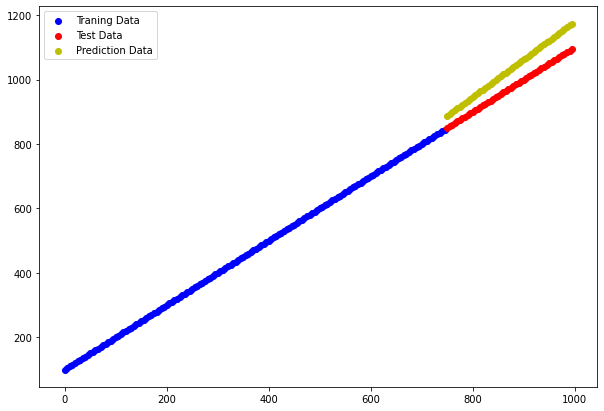

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 7))
plt.scatter(x_reg_train, y_reg_train, c='b', label='Traning Data')
plt.scatter(x_reg_test, y_reg_test, c='r', label='Test Data')
plt.scatter(x_reg_test, reg_predict, c='y', label='Prediction Data')
plt.legend()
plt.show()

# **The missing piece - Non linearity**

In [ ]:
# set the random seed 
tf.random.set_seed(42)
# Create a model 

model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation='linear')
])

# 2. Compile a model

model_4.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"]
)

# 3. Fit a model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/100
32/32 [=

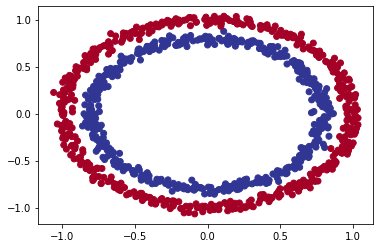

In [ ]:
# visualise the data 

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
# visulaise our prediction


doing binary classification


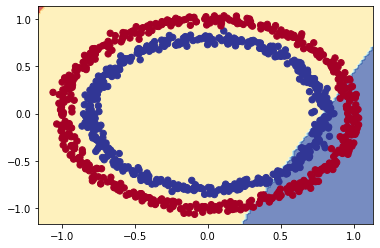

In [ ]:
# Visualising descision boundry

plot_decision_boundry(model=model_4, X=X, y=y)

# **Build a nural network with not linear activation function** 

In [ ]:
# Set a random seed 
tf.random.set_seed(42)

# 1. Create a model with non linear activation function
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation='relu'),
])

# 2. Compile a model
model_5.compile(
    loss="binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# 3. Fit a model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

doing binary classification


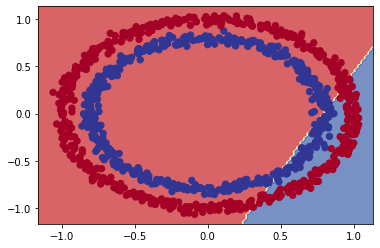

In [ ]:
#Visualising plot dicision boundry of model_5
plot_decision_boundry(model=model_5, X=X, y=y)

In [ ]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
  # tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(6, activation='relu'), 
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(2),
])


# 2. Compile a model

model_6.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"]
)

# 3. Fit a model

history = model_6.fit(X, y, epochs = 400)

Epoch 1/400


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 5.1223 - accuracy: 0.5000
Epoch 2/400
32/32 [==============================] - 0s 1ms/step - loss: 4.7416 - accuracy: 0.5000
Epoch 3/400
32/32 [==============================] - 0s 2ms/step - loss: 4.5048 - accuracy: 0.5000
Epoch 4/400
32/32 [==============================] - 0s 1ms/step - loss: 4.3914 - accuracy: 0.5000
Epoch 5/400
32/32 [==============================] - 0s 2ms/step - loss: 4.2938 - accuracy: 0.5000
Epoch 6/400
32/32 [==============================] - 0s 2ms/step - loss: 4.2255 - accuracy: 0.5000
Epoch 7/400
32/32 [==============================] - 0s 2ms/step - loss: 4.2179 - accuracy: 0.5000
Epoch 8/400
32/32 [==============================] - 0s 2ms/step - loss: 4.2145 - accuracy: 0.5000
Epoch 9/400
32/32 [==============================] - 0s 1ms/step - loss: 4.2118 - accuracy: 0.5000
Epoch 10/400
32/32 [==============================] - 0s 2ms/step - loss: 4.2097 - accuracy: 0.5000
Epoch 11/400
32/32 [=

doing multiclass classification


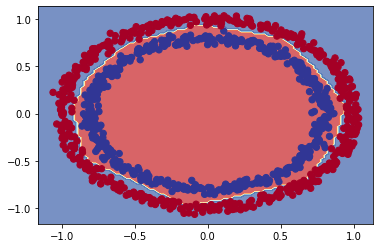

In [ ]:
# Visualising model_6 discision boundry

plot_decision_boundry(model=model_6, X=X, y=y)

In [ ]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
  # tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(6, activation='relu'), 
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])


# 2. Compile a model

model_7.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"]
)

# 3. Fit a model

history_7 = model_7.fit(X, y, epochs = 200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.4960
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5010
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4970
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4760
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5020
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5020
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5020
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.4810
Epoch 11/200
32/32 [=

doing multiclass classification


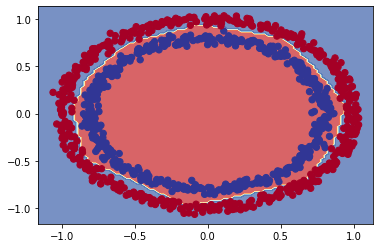

In [ ]:
# Visualising model_6 discision boundry

plot_decision_boundry(model=model_6, X=X, y=y)

# **Non Linear and Linear Function**

In [ ]:
# Create a toy tensor (similar to what we pass in the model)

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

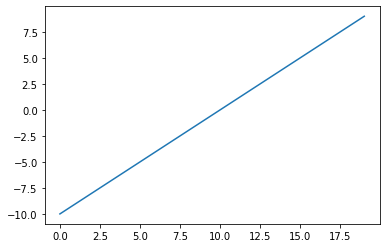

In [ ]:
# Visualise the tensor 

plt.plot(A)

#### **Replicating `sigmoid` function** -> **sigmoid(x) = `1 / (1 + exp(-x))`**

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

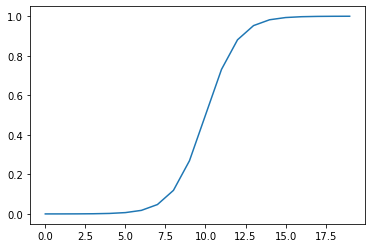

In [ ]:
# Plotting A transformed by sigmoid(A)

plt.plot(sigmoid(A))

#### **Replicating `relu` function** -> **`relu(x) = max(0, x)`**

In [ ]:
def relu(x):
  return tf.maximum(x, 0)


relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

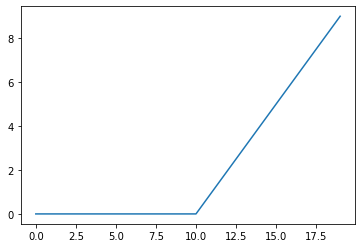

In [ ]:
# Plotting A transformed by relu

plt.plot(relu(A))

## **Evaluting and inproving our classification**

In [ ]:
# Spliting data into train and test set


X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [ ]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile a model 

model_8.compile(
    loss="binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics=["accuracy"]
)

# 3. Fit a model

history = model_8.fit(X_train, y_train, epochs = 100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4888
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4663
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4913
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4888
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5013
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4737
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4963
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5013
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4812
Epoch 11/100
25/25 [=

# **Plot loss or tarning curves**

In [ ]:
import pandas as pd

In [ ]:
# Convert history object into Dataframe

history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy
0,0.693429,0.48875
1,0.693422,0.46625
2,0.693265,0.49125
3,0.693264,0.48875
4,0.693338,0.50125


Text(0.5, 1.0, 'model_8 history curve')

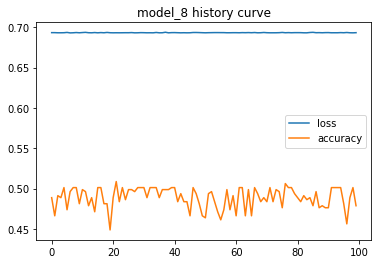

In [ ]:
# Plot the history curve 
pd.DataFrame(history.history).plot()
plt.title('model_8 history curve')

Text(0.5, 1.0, 'Modle_7 Loss curve')

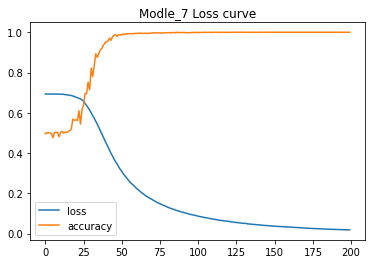

In [ ]:

pd.DataFrame(history_7.history).plot()
plt.title('Modle_7 Loss curve')

🔑 **NOTE:** For many functions loss function going down means, our model is improving(The prediction it is making is getting closer to the ground truth labels.)

# **Finding the best learning rate**

To find the learning ideal rate(Learning rate where loss decreases the most during training), We are going to use the following steps:
* A learnign rate **`callback`** - You can think of callback as an extra piece for functionality that you can add to your model *while* it's traning.
* Another model (we could use the same one as above, but we are practicing building model here.)
* A modified loss curve plot.

In [ ]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile a model
model_9.compile(
    loss="binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

# Create a learning rate epochs
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

# 3. Fit a modle
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 8ms/step - loss:

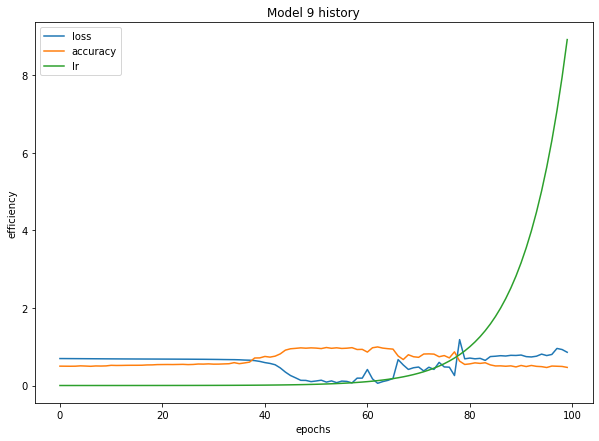

In [ ]:
# Plot loss curve of history 9

pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel='epochs', ylabel='efficiency', title='Model 9 history')

In [ ]:
# Let's try using higher *ideal* learning rate with teh same model

# set the random seed 
tf.random.set_seed(42)

# 1. Create a model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile a model 
model_10.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(lr=0.02),
    metrics = ["accuracy"],
)

# 3. Fit a model 
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

In [ ]:
# Evaluate model 10 
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

In [ ]:
# Evaluate model 8
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5050


[0.6931244134902954, 0.5049999952316284]

In [ ]:
# Evaluate model 7
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 1.0000


[0.016126498579978943, 1.0]

doing binary classification


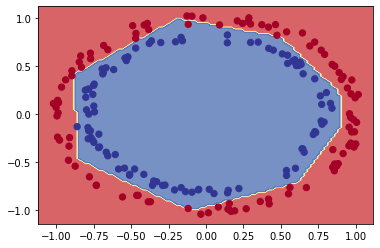

In [ ]:
# plot the discision boundry of model_10

plot_decision_boundry(model=model_10, X=X_test, y=y_test)

doing binary classification


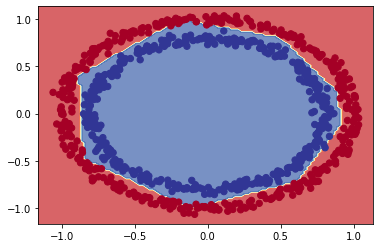

In [ ]:
# Plot discision boundry of model_10 with traning data 
plot_decision_boundry(model=model_10, X=X_train, y=y_train)

doing binary classification


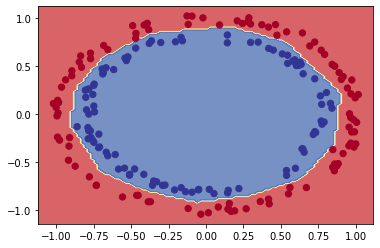

In [ ]:
# Plot decision boundry of model_7

plot_decision_boundry(model=model_7, X=X_test, y=y_test)

# **More classification evalution methods**

Alongsize visualizing our models result as much as possible, there are other of handful classification methods & metrics you should be femilier with:
 
* Accuracy 
* Precision 
* Recall
* F1-score 
* confusion metrix
* Classification report (from scikit-learn)

In [ ]:
# Check the accuracy of the model
loss, accuracy = model_10.evaluate(X_test, y_test)

print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740184709429741
Model accuracy on the test set: 99.00%


## **Confusion matrix**

How to create a confusion matrix?

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# make prediction 
y_pred = model_10.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_pred))



array([[99,  2],
       [ 0, 99]])

In [ ]:
y_pred[:10]

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622977e-01],
       [1.8126935e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6460500e-04]], dtype=float32)

In [ ]:
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

## **Pretify confusion matrix**

# **Working with a larger example (multiclass classification)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data is already sorted into Test set and Train set.
(train_data, train_lebels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Let's see the data 

print(f"Training data:\n{train_data[0]}\n")
print(f"Training label:\n{train_lebels[0]}\n")

Training data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

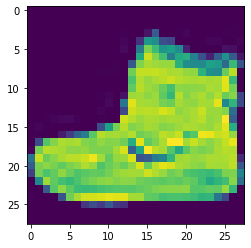

In [ ]:
# lets visulaise the data 
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [ ]:
# Create a human readable lebels
classes_labels = ["t-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandel", "Shirt", "Sneaker", "Bag", "Ankle boot"]

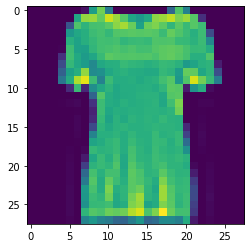

In [ ]:
# Plot a example image and it's label
plt.imshow(train_data[10])
plt.show()

In [ ]:
# Human readable label of the above data 
classes_labels[train_lebels[10]]

't-shirt/top'

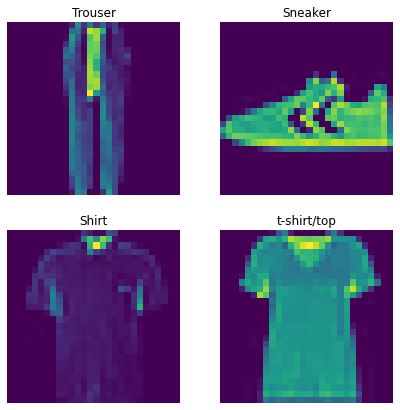

In [ ]:
import random
# Let's visualise random data from the train_data 

plt.figure(figsize=(7,7))
for i in range(4):
  plt.subplot(2, 2, i+1)
  random_index = random.randint(0,60000)
  plt.imshow(train_data[random_index])
  plt.title(classes_labels[train_lebels[random_index]])
  plt.axis(
      False
  )


# **Building a multi-class classification model**

For the multi-class classification we use a similar architechture as binary classification with few tweaks:-
Few of the tweaks we will have to make -> 

* **Input shape ->** 28 X 28 (size of a single image)
* **Output shape ->** No of labels (In this case 10)
* **Activation Funciton of output layer ->** `softmax`
* **Loss Function ->** `tf.keras.losses.CategoricalCrossentropy`
  * If your labels are one_hot_encoded then use `CategoricalCrossentropy` or if your labels are in intiger form use `SparseCategoricalCrossentropy`

In [ ]:
train_data[10].shape

(28, 28)

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create a model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),                             
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# 2. Compile a model
model_11.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# 3. Fit a model
non_norm_history = model_11.fit(train_data, tf.one_hot(train_lebels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

### **Neural network prefer data to be scaled (or normalized) this means they like numbers in the tensors between 0 & 1**

In [ ]:
# We can get our traning and test data between 0 & 1 by dividing the tensor by maximum


train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0


# Check the min and max of scaled training and test data
train_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create a model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),                             
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# 2. Compile a model
model_12.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# 3. Fit a model
norm_history = model_12.fit(train_data_norm, tf.one_hot(train_lebels, depth=10), epochs=10, validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

> 🗝️ **Note** Nural network prefer numerical data scaled/normalized (numbers between 0 & 1)

In [ ]:
import pandas as pd


Text(0.5, 1.0, 'Non Normalized Data')

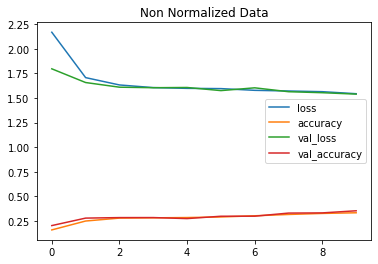

In [ ]:
pd.DataFrame(non_norm_history.history).plot()
plt.title('Non Normalized Data')

Text(0.5, 1.0, 'Normalized Data')

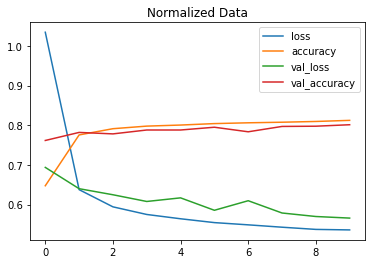

In [ ]:
pd.DataFrame(norm_history.history).plot()
plt.title('Normalized Data')

#### **🗝️ Note:** The same model with *slightly* different data can produce *dramaticily* different results, so when comparing models, it's important you're comparing them on same criteria. (e.g: Same architecture different data or different architecture same data)

# Finding the ideal learning rate

In [ ]:
from gc import callbacks
# set the random seed 
tf.random.set_seed(42)

# 1. Create a model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20)) 

# 2. Compile a model

model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)



find_lr_history = model_13.fit(train_data_norm, train_lebels, epochs = 40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding ideal learning rate')

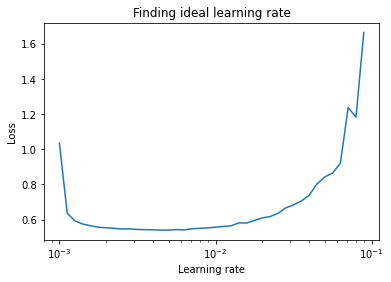

In [ ]:
# plot the learning rate decay curve 
import matplotlib.pyplot as plt
import pandas as pd


lrs = 1e-3 * (10 ** (tf.range(40)/20))

plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding ideal learning rate")



In [ ]:
# Let's refit a model with ideal learning rate
# set random seed 
tf.random.set_seed(42)

# 1. Create a model 
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax"),
])

# 2. Compile a model

model_14.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# 3. Fit a model

history_14 = model_14.fit(
    train_data_norm, 
    train_lebels, 
    epochs=20,
    validation_data = (
        test_data_norm,
        test_labels
    )
    )

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## **Evaluating our multi-class classification model**

To evaluate a multi-class classification we could:
* Evaluate its performance using other classification metrics (such as confusion metrics)

* Asses some of it's predictions through visualization
* Improve the result (by traning it for longer or changing the architecture)
* Save and export it for use in an application. 

In [ ]:
# import confusion matrix 
from sklearn.metrics import confusion_matrix

In [ ]:
# create a confusion matrix


import itertools

def make_confuison_metrics(y_true, y_pred, classes=None, figsize=(10, 10), fontSize=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalise our confusion matrix

  n_classes = cm.shape[0]

  # Let's prettyfy it
  fig, ax = plt.subplot(figsize = figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axis 
  ax.set(
      title='Confusion Matrix',
      xlabel='Predicted label',
      ylabel='True label',
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels = labels,
      yticklabels = labels,
  )

  # Set x axis label to bottom 
  ax.xaxis.set_label_position("bottom")
  ax.xaxas.tick_bottom()

  # Adjust label size 
  ax.yaxis.label.set_size(fontSize)
  ax.xaxis.label.set_size(fontSize)
  ax.title.set_size(fontSize)

  # Set threshold for different color 
  thershold = (cm.max() + cm.min())/2.

  # Plot the text on each side 
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)", 
           horizontalalignment="center",
           color="white" if cm[i, j] > thershold else "black",size = 15)

In [ ]:
classes_labels

['t-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandel',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some prediction with our model

y_probs = model_14.predict(test_data_norm) # probs is short for prediction probablities

# view the first five probs
y_probs[:5]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), classes_labels[tf.argmax(y_probs[0])]

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all the prediction probs into int

y_preds = y_probs.argmax(axis=1)


# View the first 10 prediction label
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

In [ ]:
# Make a prettier confusion matrix

make_confuison_metrics(y_true=test_labels, y_pred=y_preds,)

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

> 🗝️ **Note:** Often when working with image data and other form of visual data, it's good idea to visualise as much as possible to devlop a further understanding of the data and the inputs and outputs of your model.

How about create a fun little function for:

* Plot a random image
* Make a prediction on said image 
* Label the plot with truth label & the predicted label

In [ ]:
import random 

def plot_random_image(model, images, true_labels, classes):
  """
  Plots a random image, plots it and labels it with a prediction and truth label.
  """
  # set up a random int
  i = random.randint(0, len(images))
  # Create predictions and targets
  target_image = images[i]
  pred_prob = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_prob.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image 
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the title depending on the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Add xlabel information (prediction/true label)
  plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_prob):2.0f}%, (True: {true_label})", color=color)

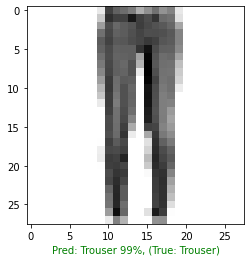

In [ ]:
plot_random_image(model=model_14, images=test_data_norm, true_labels=test_labels, classes=classes_labels)

# **What pattern exactaly is our model learning**

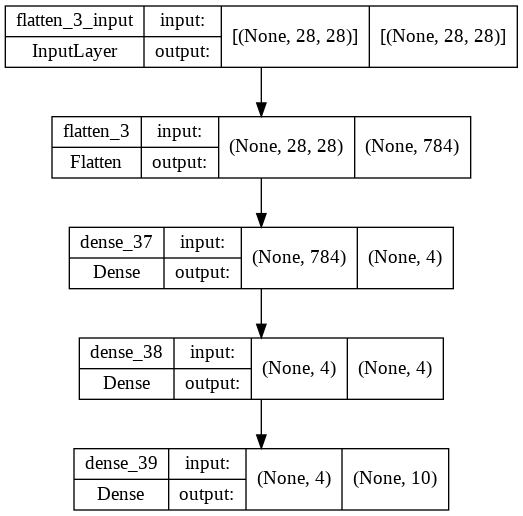

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_14, show_shapes=True)

Weights = per datapoint and are there as much as the number of nurons

Biases = per layers as much as no of nurons (it tells how much the nuron should influence the learning of the next layer.)